<a href="https://colab.research.google.com/github/prateeksrivastava07/NN-and-CNN/blob/main/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [ ]:
fm=tf.keras.datasets.cifar10

In [ ]:
(xtr,ytr),(xtst,ytst)=fm.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
xtr.shape

(50000, 32, 32, 3)

In [ ]:
ytr.shape

(50000, 1)

In [ ]:
ytr[:5]  # the output looks like 2D----need to convert into 1D

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
ytr=ytr.reshape(-1,) # -1 representes total no. of images like here 50000 images. if you want to convert like [6] to 6 index then leave blank as second argument

In [ ]:
ytr[:5]   # see now its in 1D

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
cn=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']   # class Labels

In [ ]:
cn[0]

'airplane'

In [ ]:
ytr[0]

6

In [ ]:
cn[ytr[0]]      # ytr[0] represents label (any value from 0 to 9) of 0th element of ytr

'frog'

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(cn[y[index]])

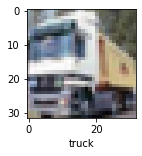

In [ ]:
plot_sample(xtr, ytr, 1)

In [ ]:

xtrain = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in xtr])
xtest = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in xtst])

In [ ]:
#Scale the image
xtrain=xtrain.reshape(xtrain.shape[0],32,32,1)
xtest=xtest.reshape(xtest.shape[0],32,32,1)

xtrain=xtrain/255.0
xtest=xtest/255.0

In [ ]:
#Now implement CNN
CnnModel=tf.keras.Sequential([
tf.keras.layers.Conv2D(32,(3,3),input_shape=(32,32,1),activation='relu',padding='same'),
tf.keras.layers.MaxPool2D((2,2)),
tf.keras.layers.Conv2D(32,(3,3),activation='relu', padding='same'),
tf.keras.layers.MaxPool2D((2,2)),

tf.keras.layers.Flatten(),
tf.keras.layers.Dense(100,activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(60,activation='relu'),
tf.keras.layers.Dropout(0.1),
tf.keras.layers.Dense(10,activation='Softmax')])

In [ ]:
#Compile This model
CnnModel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

In [ ]:
#history=CnnModel.fit(xtr,tf.keras.utils.to_categorical(ytr),epochs=5,validation_split=0.25,callbacks=[early_stopping])
#history=CnnModel.fit(xtrain,tf.keras.utils.to_categorical(ytr),epochs=5,validation_split=0.25)
history=CnnModel.fit(xtrain,ytr,epochs=3,validation_split=0.25) # increase epoches for better accuracy

Epoch 1/3
1172/1172 [==============================] - 47s 40ms/step - loss: 1.7353 - accuracy: 0.3690 - val_loss: 1.3879 - val_accuracy: 0.5107
Epoch 2/3
1172/1172 [==============================] - 48s 41ms/step - loss: 1.3583 - accuracy: 0.5176 - val_loss: 1.2481 - val_accuracy: 0.5559
Epoch 3/3
1172/1172 [==============================] - 47s 40ms/step - loss: 1.2037 - accuracy: 0.5775 - val_loss: 1.1271 - val_accuracy: 0.5986


You can see that at the end of 5 epochs, accuracy is at around 49%


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = CnnModel.predict(xtest)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(ytst, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.63      0.63      1000
           1       0.78      0.67      0.72      1000
           2       0.41      0.48      0.44      1000
           3       0.49      0.23      0.31      1000
           4       0.41      0.71      0.52      1000
           5       0.60      0.44      0.51      1000
           6       0.71      0.66      0.68      1000
           7       0.64      0.73      0.68      1000
           8       0.79      0.66      0.72      1000
           9       0.66      0.75      0.70      1000

    accuracy                           0.60     10000
   macro avg       0.61      0.60      0.59     10000
weighted avg       0.61      0.60      0.59     10000



In [ ]:
CnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               204900    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

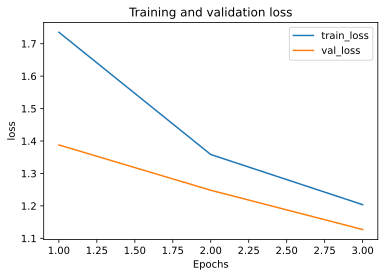

In [ ]:
plot_metric(history, 'loss')

In [ ]:
y_pred=CnnModel.predict(xtest)

In [ ]:
ytst=ytst.reshape(-1,) # -1 representes total no. of images like here 50000 images. if you want to convert like [6] to 6 index then leave blank as second argument

In [ ]:
i=9909
ClassLabel=np.argmax(y_pred[i])
print(cn[ClassLabel])
#print(ytst[i])
print(cn[ytst[i]])

automobile
automobile
